In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from pathlib import Path

# your dataset root in Drive
DATA_ROOT = Path("/content/drive/MyDrive/data for dl2")

# files inside it
CSV_PATH   = DATA_ROOT / "mot_labels.csv"
PARQUET    = DATA_ROOT / "mot_labels.parquet"
VIDEOS_DIR = DATA_ROOT / "bdd100k_videos_train_00"

print("✅ Data folder:", DATA_ROOT)
print("CSV exists:", CSV_PATH.exists())
print("Videos folder exists:", VIDEOS_DIR.exists())

✅ Data folder: /content/drive/MyDrive/data for dl2
CSV exists: True
Videos folder exists: True


In [3]:
import pandas as pd

csv_path = CSV_PATH
df = pd.read_csv(csv_path)
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
df.head()

/tmp/ipython-input-2794192958.py:4: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Rows: 2890846
Columns: ['name', 'videoName', 'frameIndex', 'id', 'category', 'attributes.crowd', 'attributes.occluded', 'attributes.truncated', 'box2d.x1', 'box2d.x2', 'box2d.y1', 'box2d.y2', 'haveVideo']


,name,videoName,frameIndex,id,category,attributes.crowd,attributes.occluded,attributes.truncated,box2d.x1,box2d.x2,box2d.y1,box2d.y2,haveVideo
0,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89537.0,car,False,True,False,825.173210,1003.094688,355.011547,418.198614,True
1,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89538.0,car,False,True,False,484.295612,700.461894,346.697460,424.849885,True
2,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89539.0,pedestrian,False,True,False,645.588915,663.879908,338.383372,358.337182,True
3,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89540.0,car,False,False,False,120.969977,192.471132,359.168591,409.053118,True
4,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89541.0,car,False,False,False,251.501155,315.519630,354.180139,400.739030,True


In [4]:
from pathlib import Path
import pandas as pd

DATA_ROOT = Path("/content/drive/MyDrive/data for dl2")  # change if copied locally
CSV_PATH   = DATA_ROOT / "mot_labels.csv"
VIDEO_DIR  = DATA_ROOT / "bdd100k_videos_train_00"

print("CSV:", CSV_PATH.exists(), "| Video folder:", VIDEO_DIR.exists())

CSV: True | Video folder: True


In [5]:
# Load CSV
df = pd.read_csv(CSV_PATH)
print("✅ Loaded dataframe:", df.shape)
df.head()


/tmp/ipython-input-843152711.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


✅ Loaded dataframe: (2890846, 13)


,name,videoName,frameIndex,id,category,attributes.crowd,attributes.occluded,attributes.truncated,box2d.x1,box2d.x2,box2d.y1,box2d.y2,haveVideo
0,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89537.0,car,False,True,False,825.173210,1003.094688,355.011547,418.198614,True
1,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89538.0,car,False,True,False,484.295612,700.461894,346.697460,424.849885,True
2,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89539.0,pedestrian,False,True,False,645.588915,663.879908,338.383372,358.337182,True
3,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89540.0,car,False,False,False,120.969977,192.471132,359.168591,409.053118,True
4,01c71072-718028b8-0000001.jpg,01c71072-718028b8,0,89541.0,car,False,False,False,251.501155,315.519630,354.180139,400.739030,True


In [6]:
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isna().sum())

# Basic summary
print("\nData types:\n", df.dtypes)
print("\nUnique categories:", df["category"].unique())
print("\nNumber of unique videos:", df["videoName"].nunique())

Columns: ['name', 'videoName', 'frameIndex', 'id', 'category', 'attributes.crowd', 'attributes.occluded', 'attributes.truncated', 'box2d.x1', 'box2d.x2', 'box2d.y1', 'box2d.y2', 'haveVideo']

Missing values per column:
 name                       0
videoName                  0
frameIndex                 0
id                      3930
category                3930
attributes.crowd        3930
attributes.occluded     3930
attributes.truncated    3930
box2d.x1                3930
box2d.x2                3930
box2d.y1                3930
box2d.y2                3930
haveVideo                  0
dtype: int64

Data types:
 name                     object
videoName                object
frameIndex                int64
id                      float64
category                 object
attributes.crowd         object
attributes.occluded      object
attributes.truncated     object
box2d.x1                float64
box2d.x2                float64
box2d.y1                float64
box2d.y2                

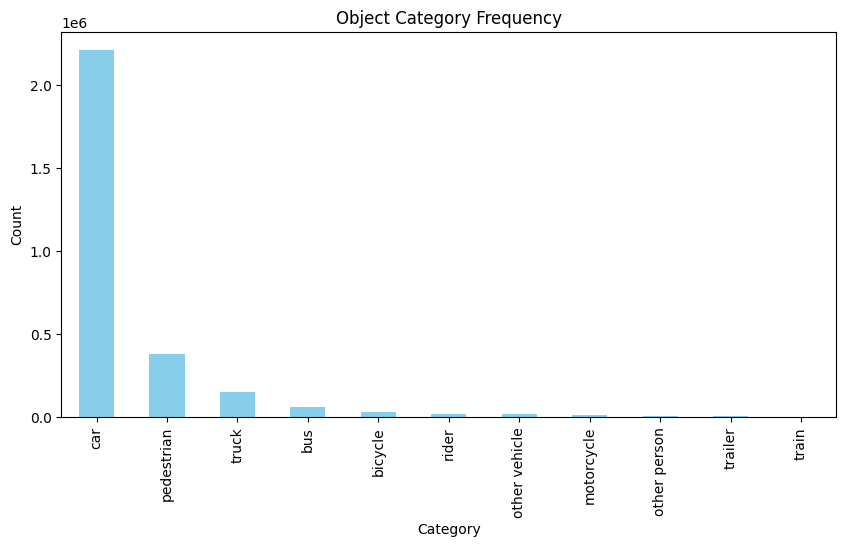

In [7]:
import matplotlib.pyplot as plt

class_counts = df["category"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
class_counts.plot(kind="bar", color='skyblue')
plt.title("Object Category Frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


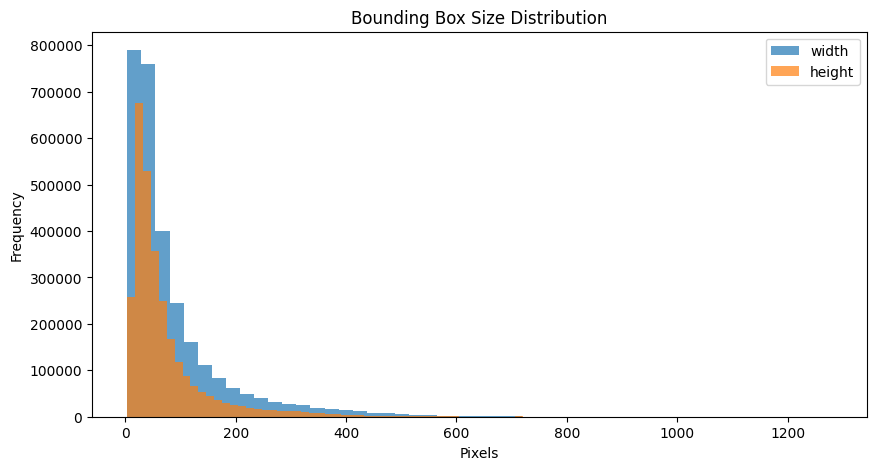

In [8]:
# Compute bbox width & height
df["bbox_width"]  = df["box2d.x2"] - df["box2d.x1"]
df["bbox_height"] = df["box2d.y2"] - df["box2d.y1"]

# Distribution of bounding box sizes
plt.figure(figsize=(10,5))
plt.hist(df["bbox_width"], bins=50, alpha=0.7, label="width")
plt.hist(df["bbox_height"], bins=50, alpha=0.7, label="height")
plt.legend()
plt.title("Bounding Box Size Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()

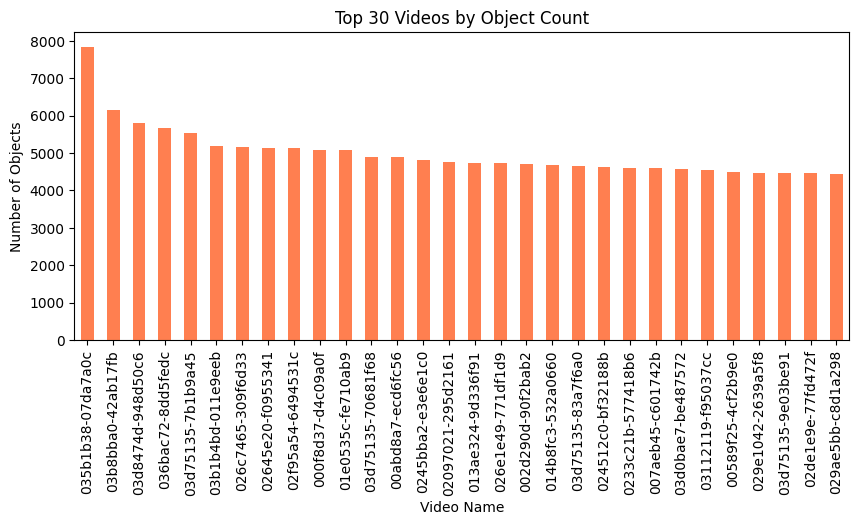

Average objects per video: 2062.082857142857


In [9]:
objects_per_video = df.groupby("videoName")["category"].count().sort_values(ascending=False)
plt.figure(figsize=(10,4))
objects_per_video.head(30).plot(kind='bar', color='coral')
plt.title("Top 30 Videos by Object Count")
plt.ylabel("Number of Objects")
plt.xlabel("Video Name")
plt.show()

print("Average objects per video:", objects_per_video.mean())

In [10]:
import cv2
import os

video_info_list = []

for video_path in list(VIDEO_DIR.glob("*.mp4"))[:5]:  # analyze first 5 videos
    cap = cv2.VideoCapture(str(video_path))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frames / fps if fps > 0 else 0
    video_info_list.append({
        "video_name": video_path.name,
        "frames": frames,
        "fps": fps,
        "duration_sec": round(duration, 2),
        "resolution": f"{width}x{height}"
    })
    cap.release()

import pandas as pd
vid_df = pd.DataFrame(video_info_list)
vid_df

""


In [ ]:
display(df.describe())

,frameIndex,id,box2d.x1,box2d.x2,box2d.y1,box2d.y2,bbox_width,bbox_height
count,2.890846e+06,2.886916e+06,2.886916e+06,2.886916e+06,2.886916e+06,2.886916e+06,2.886916e+06,2.886916e+06
mean,9.982219e+01,5.622211e+04,5.462039e+02,6.314012e+02,3.269960e+02,3.990240e+02,8.519731e+01,7.202802e+01
std,5.854681e+01,3.250190e+04,3.048319e+02,3.133421e+02,8.668669e+01,9.919633e+01,9.560055e+01,7.714970e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,4.841817e+00,0.000000e+00,9.976905e+00,3.458502e+00,3.160854e+00
25%,4.900000e+01,2.819900e+04,3.351870e+02,4.101657e+02,2.753956e+02,3.349640e+02,2.734930e+01,2.729163e+01
50%,9.900000e+01,5.598400e+04,5.458199e+02,6.056813e+02,3.275751e+02,3.894000e+02,4.963510e+01,4.550035e+01
75%,1.510000e+02,8.445600e+04,7.486437e+02,8.244570e+02,3.747413e+02,4.494345e+02,1.018705e+02,8.238104e+01
max,2.620000e+02,1.128180e+05,1.273886e+03,1.280000e+03,7.107575e+02,7.200000e+02,1.280000e+03,7.200000e+02


In [11]:
from pathlib import Path
import cv2
import pandas as pd

# Correct path to the folder containing .mov videos
VIDEO_DIR = Path("/content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train")

# Use rglob to search recursively for .mov files
video_files = list(VIDEO_DIR.rglob("*.mov"))
print(f"Found {len(video_files)} MOV videos")

video_info_list = []

for video_path in video_files[:5]:  # analyze first 5
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        print("⚠️ Could not open:", video_path.name)
        continue

    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = round(frames / fps, 2) if fps > 0 else 0

    video_info_list.append({
        "video_name": video_path.name,
        "frames": frames,
        "fps": fps,
        "duration_sec": duration,
        "resolution": f"{width}x{height}"
    })
    cap.release()

vid_df = pd.DataFrame(video_info_list)
vid_df


Found 971 MOV videos


,video_name,frames,fps,duration_sec,resolution
0,0000f77c-cb820c98.mov,1215,30.151377,40.30,1280x720
1,0001542f-5ce3cf52.mov,1213,30.202930,40.16,1280x720
2,0000f77c-6257be58.mov,1217,30.148637,40.37,1280x720
3,0001542f-7c670be8.mov,1215,30.126457,40.33,1280x720
4,0004974f-05e1c285.mov,1210,30.101999,40.20,1280x720


# ***Task***
Generate the YOLOv8 dataset and finetune.yaml by optimizing video processing (pre-indexing video paths and sequential frame reading with pre-organized labels) to confirm successful creation.

Pre-index Video Paths
Subtask:
Create a dictionary mapping video names to their full paths to avoid repeated file system searches during the main processing loop.

Reasoning: The subtask requires creating a dictionary to map video names to their full paths. I will use the Path module and rglob to find all '.mov' files within the specified VIDEO_ROOT and populate the dictionary. Finally, I will print the count of indexed videos.

In [ ]:
from pathlib import Path

# 1. Define the VIDEO_ROOT variable
VIDEO_ROOT = Path("/content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train")

# 2. Initialize an empty dictionary
video_paths_map = {}

# 3. Iterate through all files ending with .mov
for video_path in VIDEO_ROOT.rglob('*.mov'):
    # 4. Extract video name (stem) and store in dictionary
    video_name_stem = video_path.stem
    video_paths_map[video_name_stem] = video_path

# 5. Print the total number of entries
print(f"Total video paths indexed: {len(video_paths_map)}")
print(f"Example mapping: {list(video_paths_map.items())[:2]}") # Print a couple of examples

Total video paths indexed: 971
Example mapping: [('0000f77c-cb820c98', PosixPath('/content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train/0000f77c-cb820c98.mov')), ('0001542f-5ce3cf52', PosixPath('/content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train/0001542f-5ce3cf52.mov'))]


Reasoning: The previous step successfully indexed video paths. To optimize the main processing loop as per the subtask, the next step involves re-initializing the YOLO dataset directory structure, reloading and filtering the dataframe for target classes, performing the train-validation split for videos, and creating a dictionary that maps each video name to another dictionary of its frames, which in turn maps to a list of its bounding box labels. This pre-organization of labels will allow for efficient sequential reading of video frames and direct lookup of labels for the current frame, avoiding repeated cap.set operations and dataframe lookups within the inner processing loop.

The cell below requires approximately one hour to complete.

In [ ]:
import os, cv2, random, shutil, subprocess
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm

# --- Paths (all outputs go to Google Drive) ---
DRIVE_ROOT   = Path("/content/drive/MyDrive")
DATA_ROOT    = DRIVE_ROOT / "data for dl2"
CSV_PATH     = DATA_ROOT / "mot_labels.csv"
VIDEO_ROOT   = DATA_ROOT / "bdd100k_videos_train_00" / "bdd100k" / "videos" / "train"  # .mov videos
YOLO_ROOT    = DRIVE_ROOT / "yolo_dataset"   # <— OUTPUT HERE (Google Drive)

# --- Create output structure safely (no rm -rf on Drive root) ---
for sub in ["images/train","images/val","labels/train","labels/val"]:
    (YOLO_ROOT/sub).mkdir(parents=True, exist_ok=True)
print(f"✅ YOLO dataset structure ready at: {YOLO_ROOT}")

# --- Load CSV ---
assert CSV_PATH.exists(), f"CSV not found: {CSV_PATH}"
df = pd.read_csv(CSV_PATH, low_memory=False)
print("✅ CSV loaded:", df.shape)

# --- Target classes & filtering ---
TARGET_CLASSES = ["car"]  # add "pedestrian" if needed
df_filtered = df[df["category"].isin(TARGET_CLASSES)].copy()
df_filtered["frameIndex"] = df_filtered["frameIndex"].astype(int)
print("Filtered to categories:", df_filtered["category"].unique())

# --- Split by videoName (videoName column should match file stems) ---
videos_all = df_filtered["videoName"].dropna().unique().tolist()
random.seed(42)
random.shuffle(videos_all)
split_idx = int(0.8 * len(videos_all))
train_videos = set(videos_all[:split_idx])
val_videos   = set(videos_all[split_idx:])
def get_split_name(vname): return "train" if vname in train_videos else "val"
print(f"Total videos with target classes: {len(videos_all)} | Train: {len(train_videos)} | Val: {len(val_videos)}")

# --- Class mapping ---
CLASS_MAP = {c: i for i, c in enumerate(TARGET_CLASSES)}
print("Class Map:", CLASS_MAP)

# --- Build a map from video stem -> path (supports .mov and .mp4) ---
video_paths_map = {}
for ext in ("*.mov", "*.mp4", "*.MOV", "*.MP4"):
    for p in (VIDEO_ROOT).glob(ext):
        video_paths_map[p.stem] = p
print(f"Found {len(video_paths_map)} video files in {VIDEO_ROOT}")

# --- Optional helper: convert to .mp4 if OpenCV cannot read .mov ---
CACHE_MP4 = DRIVE_ROOT / "_cache_mp4"
CACHE_MP4.mkdir(exist_ok=True)

def ensure_readable_video(path: Path) -> Path:
    """Try to open with cv2. If fails and is .mov, convert once to mp4 in Drive cache."""
    cap = cv2.VideoCapture(str(path))
    if cap.isOpened():
        cap.release()
        return path
    cap.release()
    # Try conversion if .mov
    if path.suffix.lower() == ".mov":
        out = CACHE_MP4 / f"{path.stem}.mp4"
        if not out.exists():
            print(f"⚙️ Converting {path.name} → {out.name} (ffmpeg)")
            # ffmpeg is available on Colab by default
            cmd = ["ffmpeg", "-y", "-i", str(path), "-c:v", "libx264", "-preset", "fast", "-crf", "23", "-c:a", "aac", str(out)]
            subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=False)
        # verify the new file is readable
        cap2 = cv2.VideoCapture(str(out))
        if cap2.isOpened():
            cap2.release()
            return out
        cap2.release()
    print(f"⚠️ Could not open video even after conversion: {path}")
    return None

# --- Pre-organize labels by video and frame for efficient access ---
labels_by_video_frame = {}
for vname, video_group in tqdm(df_filtered.groupby("videoName"), desc="Pre-organizing labels"):
    labels_by_video_frame[vname] = {}
    for frame_idx, frame_group in video_group.groupby("frameIndex"):
        labels_by_video_frame[vname][frame_idx] = frame_group.to_dict('records')

print("✅ Labels pre-organized for efficient access.")
if labels_by_video_frame:
    sample_vid = next(iter(labels_by_video_frame))
    ex = labels_by_video_frame[sample_vid]
    print(f"Example video: {sample_vid}, sample frame count: {len(ex)}")

# --- Geometry / resizing config ---
RESIZE_LONGEST = 640   # Target for longest side
FRAME_STRIDE   = 1     # Use >1 to sample frames

def normalize_bbox(bbox, img_width, img_height):
    """Pixel coords -> YOLO (cx, cy, w, h) normalized [0,1]."""
    x1, y1, x2, y2 = bbox
    # clamp
    x1 = max(0, min(x1, img_width - 1))
    y1 = max(0, min(y1, img_height - 1))
    x2 = max(0, min(x2, img_width - 1))
    y2 = max(0, min(y2, img_height - 1))
    cx = (x1 + x2) / 2 / img_width
    cy = (y1 + y2) / 2 / img_height
    w  = (x2 - x1) / img_width
    h  = (y2 - y1) / img_height
    return cx, cy, w, h

def resize_and_pad(image, target_longest_side):
    """Resize keeping aspect ratio to target_longest_side, then center-pad to square."""
    h, w = image.shape[:2]
    scale = target_longest_side / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h))

    canvas = np.zeros((target_longest_side, target_longest_side, 3), dtype=np.uint8)
    x_off = (target_longest_side - new_w) // 2
    y_off = (target_longest_side - new_h) // 2
    canvas[y_off:y_off + new_h, x_off:x_off + new_w] = resized
    return canvas, scale, x_off, y_off

# --- Process videos & write images/labels to Google Drive ---
images_saved = 0
labels_saved = 0
skipped_videos = 0

for video_name_stem in tqdm(labels_by_video_frame.keys(), desc="Processing videos"):
    if video_name_stem not in video_paths_map:
        print(f"⚠️ Labels exist for '{video_name_stem}' but file not found in {VIDEO_ROOT}")
        skipped_videos += 1
        continue

    raw_path = video_paths_map[video_name_stem]
    use_path = ensure_readable_video(raw_path)
    if use_path is None:
        skipped_videos += 1
        continue

    split_name = get_split_name(video_name_stem)
    cap = cv2.VideoCapture(str(use_path))
    if not cap.isOpened():
        print(f"⚠️ Could not open video {use_path}. Skipping.")
        skipped_videos += 1
        continue

    labeled_frames = sorted(labels_by_video_frame[video_name_stem].keys())
    for frame_idx in labeled_frames:
        if frame_idx % FRAME_STRIDE != 0:
            continue
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ok, frame = cap.read()
        if not ok:
            print(f"⚠️ Failed to read frame {frame_idx} from {video_name_stem}. Skipping.")
            continue

        # Prepare image
        img_sq, scale_factor, x_offset, y_offset = resize_and_pad(frame, RESIZE_LONGEST)

        # Save image to Drive
        img_filename = f"{video_name_stem}_{frame_idx:06d}.jpg"
        img_save_path = YOLO_ROOT / "images" / split_name / img_filename
        cv2.imwrite(str(img_save_path), img_sq)
        images_saved += 1

        # Build YOLO labels for this frame
        yolo_lines = []
        for ann in labels_by_video_frame[video_name_stem][frame_idx]:
            cat_id = CLASS_MAP[ann["category"]]
            x1, y1, x2, y2 = ann["box2d.x1"], ann["box2d.y1"], ann["box2d.x2"], ann["box2d.y2"]
            # adjust coords due to resize+pad
            ax1 = (x1 * scale_factor) + x_offset
            ay1 = (y1 * scale_factor) + y_offset
            ax2 = (x2 * scale_factor) + x_offset
            ay2 = (y2 * scale_factor) + y_offset
            cx, cy, w, h = normalize_bbox((ax1, ay1, ax2, ay2), RESIZE_LONGEST, RESIZE_LONGEST)
            # clip tiny or invalid boxes (optional)
            if w > 0 and h > 0:
                yolo_lines.append(f"{cat_id} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}")

        # Save label file to Drive (only if at least one bbox)
        if yolo_lines:
            lbl_filename = f"{video_name_stem}_{frame_idx:06d}.txt"
            label_save_path = YOLO_ROOT / "labels" / split_name / lbl_filename
            with open(label_save_path, "w") as f:
                f.write("\n".join(yolo_lines))
            labels_saved += 1

    cap.release()

print(f"\n✅ Done. Saved {images_saved} images and {labels_saved} label files to {YOLO_ROOT}. Skipped videos: {skipped_videos}")

# --- Write dataset.yaml into Drive ---
dataset_yaml_content = f"""# Auto-generated
path: {YOLO_ROOT.resolve()}
train: images/train
val: images/val

nc: {len(CLASS_MAP)}
names: {list(CLASS_MAP.keys())}
"""
with open(YOLO_ROOT / "dataset.yaml", "w") as f:
    f.write(dataset_yaml_content)
print(f"✅ Generated dataset.yaml at {YOLO_ROOT/'dataset.yaml'}")

✅ YOLO dataset structure ready at: /content/drive/MyDrive/yolo_dataset
✅ CSV loaded: (2890846, 13)
Filtered to categories: ['car']
Total videos with target classes: 1400 | Train: 1120 | Val: 280
Class Map: {'car': 0}
Found 971 video files in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train


Pre-organizing labels:   0%|          | 0/1400 [00:00<?, ?it/s]

✅ Labels pre-organized for efficient access.
Example video: 0000f77c-6257be58, sample frame count: 203


Processing videos:   0%|          | 0/1400 [00:00<?, ?it/s]

⚠️ Labels exist for '026ebbcd-0c0ee998' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train
⚠️ Labels exist for '0276479f-18918bff' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train
⚠️ Labels exist for '0276479f-1f42729b' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train
⚠️ Labels exist for '028260c8-52f0dd00' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train
⚠️ Labels exist for '02844a1f-c957e1c3' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train
⚠️ Labels exist for '02858212-e0d90c01' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train
⚠️ Labels exist for '02864c06-90dae1dd' but file not found in /content/drive/MyDrive/data for dl2/bdd100k_videos_train_00/bdd100k/videos/train

# ***From now you only run this to get yolo dataset for training***

In [ ]:
# --- 1️⃣ Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 2️⃣ Set up paths ---
DATA_YAML = "/content/drive/MyDrive/yolo_dataset/dataset.yaml"  # ready data set
PROJECT   = "/content/drive/MyDrive/yolo_training"               # forlder of traninings
MODEL_W   = "yolov8n.pt"

# --- 3️⃣ Check that dataset.yaml exists ---
import os
if os.path.exists(DATA_YAML):
    print("✅ Dataset found and ready:", DATA_YAML)
else:
    print("❌ dataset.yaml not found — make sure your Drive is mounted correctly.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset found and ready: /content/drive/MyDrive/yolo_dataset/dataset.yaml


# ***Final strategy, making our own mot_labels in https://www.makesense.ai/***

In [12]:
import zipfile, glob, os

zip_files = sorted(glob.glob("/content/done*.zip"))   # finds done1.zip … done8.zip

print("Found:", zip_files)

for z in zip_files:
    folder_name = z.replace(".zip","")
    print(f"📂 Extracting {z} → {folder_name}")
    os.makedirs(folder_name, exist_ok=True)

    with zipfile.ZipFile(z, 'r') as zip_ref:
        zip_ref.extractall(folder_name)

print("✅ All ZIP files extracted.")


Found: ['/content/done 4.zip', '/content/done1.zip', '/content/done2.zip', '/content/done3.zip', '/content/done5.zip', '/content/done6.zip', '/content/done7.zip', '/content/done8.zip']
📂 Extracting /content/done 4.zip → /content/done 4
📂 Extracting /content/done1.zip → /content/done1
📂 Extracting /content/done2.zip → /content/done2
📂 Extracting /content/done3.zip → /content/done3
📂 Extracting /content/done5.zip → /content/done5
📂 Extracting /content/done6.zip → /content/done6
📂 Extracting /content/done7.zip → /content/done7
📂 Extracting /content/done8.zip → /content/done8
✅ All ZIP files extracted.


In [13]:
import pandas as pd
from pathlib import Path
import glob

# 🔹 1. Folder that contains all your CSVs
BASE = Path("/content")   # change if needed

# 🔹 2. Pattern for your files
pattern = str(BASE / "labels_my-project-name_2025-11-16-*.csv")

csv_files = sorted(glob.glob(pattern))
print("Found CSVs:")
for f in csv_files:
    print("  ", f)

# 🔹 3. Read & combine
dfs = [pd.read_csv(f) for f in csv_files]
combined = pd.concat(dfs, ignore_index=True)

# 🔹 4. Save to one CSV
out_path = BASE / "labels_my-project-name_ALL.csv"
combined.to_csv(out_path, index=False)

print("✅ Combined CSV saved at:", out_path)
print("Total rows:", len(combined))


Found CSVs:
   /content/labels_my-project-name_2025-11-16-06-06-35.csv
   /content/labels_my-project-name_2025-11-16-06-37-44.csv
   /content/labels_my-project-name_2025-11-16-07-04-22.csv
   /content/labels_my-project-name_2025-11-16-07-27-23.csv
   /content/labels_my-project-name_2025-11-16-08-36-35.csv
   /content/labels_my-project-name_2025-11-16-08-55-20.csv
   /content/labels_my-project-name_2025-11-16-09-12-20.csv
   /content/labels_my-project-name_2025-11-16-09-58-02.csv
✅ Combined CSV saved at: /content/labels_my-project-name_ALL.csv
Total rows: 1635


In [15]:
from pathlib import Path
import zipfile

BASE = Path("/content")

# 🔍 پیدا کردن فایل زیپ (مثلاً images200.zip یا images 200.zip)
zip_candidates = list(BASE.glob("images*200*.zip"))
print("Found zip files:", zip_candidates)

if not zip_candidates:
    raise FileNotFoundError("هیچ zip ای مثل images200 پیدا نشد؛ اسم فایل را چک کن.")

zip_path = zip_candidates[0]
print("Using zip:", zip_path)

# 📂 فولدر خروجی
IMAGES_DIR = BASE / "images200"
IMAGES_DIR.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(IMAGES_DIR)

print("✅ Extracted images to:", IMAGES_DIR)


Found zip files: [PosixPath('/content/images 200.zip')]
Using zip: /content/images 200.zip
✅ Extracted images to: /content/images200


In [16]:
from pathlib import Path
import pandas as pd
from PIL import Image
import shutil, random

BASE = Path("/content")

# 📄 CSV ترکیب‌شده
CSV_PATH = BASE / "labels_my-project-name_ALL.csv"
df = pd.read_csv(CSV_PATH)
print("Columns:", df.columns.tolist())
print(df.head())

# 🔠 نام ستون‌ها در CSV تو:
image_col = "image_name"
label_col = "label_name"

x_col = "bbox_x"
y_col = "bbox_y"
w_col = "bbox_width"
h_col = "bbox_height"

W_col = "image_width"
H_col = "image_height"

# 📂 جایی که عکس‌ها بعد از unzip هستند
IMAGES_DIR = BASE / "images200"

# دیکشنری: اسم فایل → مسیر کامل (اگر توی زیرفولدر هم باشد)
all_img_paths = {}
for ext in ("*.jpg", "*.jpeg", "*.png"):
    for p in IMAGES_DIR.rglob(ext):
        all_img_paths[p.name] = p

print("Total images found:", len(all_img_paths))

# 🎯 ریشه دیتاست YOLO
YOLO_ROOT = BASE / "yolo_custom_200"
for sub in ["images/train", "images/val", "labels/train", "labels/val"]:
    (YOLO_ROOT / sub).mkdir(parents=True, exist_ok=True)

img_train_dir   = YOLO_ROOT / "images" / "train"
label_train_dir = YOLO_ROOT / "labels" / "train"

# 🧾 mapping کلاس‌ها
classes = sorted(df[label_col].unique())
class_to_id = {c: i for i, c in enumerate(classes)}
print("Class mapping:", class_to_id)

# 🔁 ساخت labelهای YOLO و کپی عکس‌ها (همه اول می‌رود در train)
missing_images = 0

for img_name, group in df.groupby(image_col):
    img_path = all_img_paths.get(img_name, None)
    if img_path is None:
        print("⚠️ Image not found for:", img_name)
        missing_images += 1
        continue

    # سایز تصویر از CSV (برای هر ردیف این تصویر یکسان است)
    W = float(group[W_col].iloc[0])
    H = float(group[H_col].iloc[0])

    # کپی تصویر به train
    dest_img = img_train_dir / img_name
    if not dest_img.exists():
        shutil.copy2(img_path, dest_img)

    # نوشتن فایل txt به فرمت YOLO
    txt_path = label_train_dir / (Path(img_name).stem + ".txt")
    with open(txt_path, "w") as f:
        for _, row in group.iterrows():
            x  = float(row[x_col])
            y  = float(row[y_col])
            bw = float(row[w_col])
            bh = float(row[h_col])

            x_center = (x + bw / 2.0) / W
            y_center = (y + bh / 2.0) / H
            bw_n     = bw / W
            bh_n     = bh / H

            cls_id = class_to_id[row[label_col]]
            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {bw_n:.6f} {bh_n:.6f}\n")

print("✅ YOLO txt labels created.")
print("Missing images:", missing_images)

# 🔀 تقسیم train / val (۸۰/۲۰)
img_val_dir   = YOLO_ROOT / "images" / "val"
label_val_dir = YOLO_ROOT / "labels" / "val"

all_imgs = list(img_train_dir.glob("*.jpg")) + list(img_train_dir.glob("*.jpeg")) + list(img_train_dir.glob("*.png"))
random.shuffle(all_imgs)

n_val = max(1, int(len(all_imgs) * 0.2))
val_imgs = all_imgs[:n_val]

print(f"Total images: {len(all_imgs)} | val: {n_val} | train: {len(all_imgs) - n_val}")

for img in val_imgs:
    label = label_train_dir / (img.stem + ".txt")
    shutil.move(img,   img_val_dir   / img.name)
    if label.exists():
        shutil.move(label, label_val_dir / label.name)

print("✅ Train/val split done.")
print("YOLO dataset root:", YOLO_ROOT)


Columns: ['label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height', 'image_name', 'image_width', 'image_height']
  label_name  bbox_x  bbox_y  bbox_width  bbox_height  \
0        car     524     344         111           97   
1        car     447     324          92           80   
2        car     426     335          47           31   
3        car     394     329          45           38   
4        car     382     332          27           22   

                     image_name  image_width  image_height  
0  028f6a10-087ef8f4_000055.jpg          640           640  
1  028f6a10-087ef8f4_000055.jpg          640           640  
2  028f6a10-087ef8f4_000055.jpg          640           640  
3  028f6a10-087ef8f4_000055.jpg          640           640  
4  028f6a10-087ef8f4_000055.jpg          640           640  
Total images found: 200
Class mapping: {'car': 0}
✅ YOLO txt labels created.
Missing images: 0
Total images: 198 | val: 39 | train: 159
✅ Train/val split done.
YOLO dataset 

In [17]:
yaml_path = YOLO_ROOT / "dataset.yaml"

with open(yaml_path, "w") as f:
    f.write(f"path: {YOLO_ROOT}\n")
    f.write("train: images/train\n")
    f.write("val: images/val\n")
    f.write("names:\n")
    for cls, idx in class_to_id.items():
        f.write(f"  {idx}: {cls}\n")

print("✅ dataset.yaml written at:", yaml_path)


✅ dataset.yaml written at: /content/yolo_custom_200/dataset.yaml


Total train images: 159


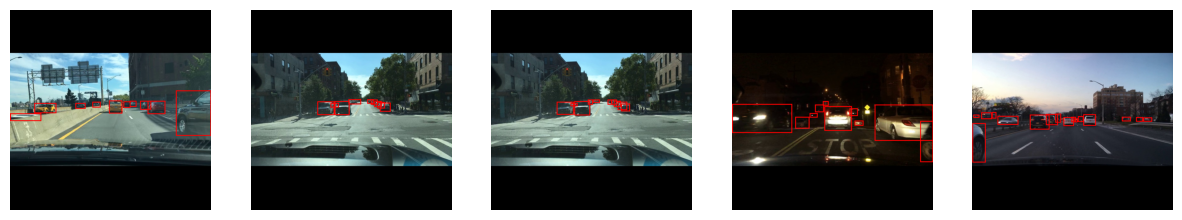

In [18]:
import random
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image, ImageDraw

# ========= CHANGE IF NEEDED =========
YOLO_ROOT = Path("/content/yolo_custom_200")   # your created dataset
IMG_DIR   = YOLO_ROOT / "images" / "train"
LBL_DIR   = YOLO_ROOT / "labels" / "train"
# ===================================

# Get random images
image_files = list(IMG_DIR.glob("*.jpg")) + list(IMG_DIR.glob("*.png"))
print("Total train images:", len(image_files))

# Number of images to preview
N = 5
sample_images = random.sample(image_files, min(N, len(image_files)))

def draw_boxes(image_path, label_path):
    img = Image.open(image_path).convert("RGB")
    W, H = img.size
    draw = ImageDraw.Draw(img)

    if not label_path.exists():
        return img

    with open(label_path, "r") as f:
        for line in f.readlines():
            cls, xc, yc, w, h = map(float, line.strip().split())

            # Convert YOLO → pixel coords
            box_w = w * W
            box_h = h * H
            x1 = (xc * W) - box_w/2
            y1 = (yc * H) - box_h/2
            x2 = x1 + box_w
            y2 = y1 + box_h

            # Draw rectangle
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    return img

# DISPLAY
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    lbl_path = LBL_DIR / (img_path.stem + ".txt")
    labeled_img = draw_boxes(img_path, lbl_path)

    plt.subplot(1, N, i+1)
    plt.imshow(labeled_img)
    plt.axis("off")

plt.show()


In [19]:
import threading, time

def keep_alive():
    while True:
        print("⏳ Still active...")
        time.sleep(60)

thread = threading.Thread(target=keep_alive)
thread.daemon = True
thread.start()


⏳ Still active...


In [20]:
!pip install -q ultralytics

from pathlib import Path
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO
from pathlib import Path

# ==== PATHS (CHANGE IF NEEDED) ====
DATA_YAML = "/content/yolo_custom_200/dataset.yaml"   # your dataset.yaml
PROJECT   = "/content/yolo_runs_200_m"                # where runs will be saved

IMGSZ  = 640       # a bit bigger for better detail
BATCH  = 4         # safe for yolov8m on Colab T4
DEVICE = 0         # GPU

# You can also put path to your previous best.pt here if you want:
BASE_WEIGHTS = "yolov8m.pt"    # or "/content/yolo_runs_mix/stage2_finetune_s4/weights/best.pt"

model = YOLO(BASE_WEIGHTS)


# ***Stage 1 – Freeze backbone, strong augmentation (warm-up)***

In [ ]:
NAME1 = "stage1_freeze_m"

results1 = model.train(
    data=DATA_YAML,
    epochs=40,              # enough for small dataset warm-up
    imgsz=IMGSZ,
    batch=BATCH,
    device=DEVICE,
    project=PROJECT,
    name=NAME1,
    workers=2,

    # ---- Optimizer & LR schedule ----
    optimizer="AdamW",
    lr0=5e-4,               # a bit higher for warm-up
    lrf=0.01,               # final LR = lr0 * lrf (with cos_lr)
    weight_decay=0.01,
    momentum=0.9,
    warmup_epochs=5,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    cos_lr=True,
    patience=50,            # early stopping if completely stuck

    # ---- Loss / regularization ----
    box=7.5,                # box loss gain
    cls=0.5,                # class loss gain
    dfl=1.5,                # distribution focal loss gain
    label_smoothing=0.0,    # you can try 0.05 if overfitting badly

    # ---- Data augmentation (quite strong, small dataset) ----
    hsv_h=0.015,
    hsv_s=0.70,
    hsv_v=0.40,
    degrees=5.0,
    translate=0.10,
    scale=0.50,
    shear=2.0,
    perspective=0.0005,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,             # full mosaic at the beginning
    mixup=0.10,
    copy_paste=0.10,
    close_mosaic=10,        # turn off mosaic in last 10 epochs

    # ---- Freeze most backbone layers ----
    freeze=10,              # good value for yolov8m
    plots=False
)

print("✅ Stage 1 finished.")


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/yolo_custom_200/dataset.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=stage1_freeze_m, nbs=64, nms=False, opset=None, optimize=F

# ***Stage 2 – Unfreeze & fine-tune everything (smaller LR)***

In [ ]:
import threading, time

def keep_alive():
    while True:
        print("⏳ Still active...")
        time.sleep(60)

thread = threading.Thread(target=keep_alive)
thread.daemon = True
thread.start()

⏳ Still active...


In [ ]:
# ---- Load best weights from Stage 1 ----
RUN1_DIR = Path(PROJECT) / NAME1
BEST     = RUN1_DIR / "weights" / "best.pt"
print("Using best weights from Stage 1:", BEST)

if not BEST.exists():
    raise FileNotFoundError(f"best.pt not found at {BEST}")

model2 = YOLO(str(BEST))

NAME2 = "stage2_finetune_m"

results2 = model2.train(
    data=DATA_YAML,
    epochs=80,              # +40 = total ~120 effective epochs
    imgsz=IMGSZ,
    batch=BATCH,
    device=DEVICE,
    project=PROJECT,
    name=NAME2,
    workers=2,

    # ---- Optimizer & LR schedule (smaller LR) ----
    optimizer="AdamW",
    lr0=2e-4,               # smaller LR for fine-tuning
    lrf=0.01,
    weight_decay=0.01,
    momentum=0.9,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    cos_lr=True,
    patience=60,

    # ---- Loss / regularization ----
    box=7.5,
    cls=0.5,
    dfl=1.5,
    label_smoothing=0.0,

    # ---- Data augmentation (still strong but a bit calmer) ----
    hsv_h=0.015,
    hsv_s=0.70,
    hsv_v=0.40,
    degrees=5.0,
    translate=0.10,
    scale=0.40,             # slightly less scaling
    shear=2.0,
    perspective=0.0005,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.8,             # still use mosaic but not full
    mixup=0.10,
    copy_paste=0.10,
    close_mosaic=15,        # last 15 epochs "realistic" training

    # ---- Now unfreeze everything ----
    freeze=0,
    plots=False
)

print("✅ Stage 2 finished.")


Using best weights from Stage 1: /content/yolo_runs_200_m/stage1_freeze_m/weights/best.pt
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=15, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/yolo_custom_200/dataset.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/yolo_runs_200_m/stage1

In [ ]:
from pathlib import Path

RUN2_DIR = Path(PROJECT) / NAME2
BEST2    = RUN2_DIR / "weights" / "best.pt"

best_model = YOLO(str(BEST2))

metrics = best_model.val(
    data=DATA_YAML,
    imgsz=IMGSZ,
    conf=0.001,
    iou=0.50,
    plots=True   # save PR curves, confusion matrix, etc.
)

print("mAP@0.50:", float(metrics.box.map50))
print("mAP@[.5:.95]:", float(metrics.box.map))
print("Val results saved in:", metrics.save_dir)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1671.2±623.6 MB/s, size: 80.6 KB)
val: Scanning /content/yolo_custom_200/labels/val.cache... 39 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 39/39 91.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 2.0it/s 1.5s
                   all         39        344      0.851      0.662      0.782      0.337
Speed: 3.9ms preprocess, 24.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/runs/detect/val
mAP@0.50: 0.7824719476858377
mAP@[.5:.95]: 0.33651392858134616
Val results saved in: /content/runs/detect/val


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/yolo_runs_200_m/stage2_finetune_m/weights/best.pt")
model.val(data="/content/yolo_custom_200/dataset.yaml", plots=True)


In [ ]:
from ultralytics import YOLO
from pathlib import Path

# 🔹 Paths (change if your paths are different)
MODEL_PATH = "/content/yolo_runs_200_m/stage2_finetune_m/weights/best.pt"
VIDEO_PATH = "/content/026b9a11-f819c1b9.mov"

# Load your finetuned model
model = YOLO(MODEL_PATH)

# Folder for results
PROJECT = "video_results"
NAME    = "test1"

results = model.predict(
    source=VIDEO_PATH,   # input video
    imgsz=640,
    conf=0.25,           # confidence threshold
    iou=0.45,
    device=0,
    save=True,           # save annotated video
    project=PROJECT,
    name=NAME,
    vid_stride=1         # 1 = every frame, 2 = every 2nd frame (faster)
)

print("✅ Inference done.")



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1209) /content/026b9a11-f819c1b9.mov: 384x640 8 cars, 48.1ms
video 1/1 (frame 2/1209) /content/026b9a11-f819c1b9.mov: 384x640 8 cars, 25.1ms
video 1/1 (frame 3/1209) /content/026b9a11-f819c1b9.mov: 384x640 8 cars, 25.0ms
video 1/1 (frame 4/1209) /content/026b9a11-f819c1b9.mov: 384x640 9 cars, 25.1ms
video 1/1 (frame 5/1209) /content/026b9a11-f819c1b9.mov: 384x640 8 cars, 25.0ms
video 1/1 (frame 6/1209) /content/026b9a11-f819c1b9.mov:

In [ ]:
from pathlib import Path

out_dir = Path(PROJECT) / NAME
print("Output folder:", out_dir)

video_files = list(out_dir.glob("*.mp4")) + list(out_dir.glob("*.avi")) + list(out_dir.glob("*.mov"))
print("Found output videos:", video_files)

if video_files:
    OUT_VIDEO = str(video_files[0])
    print("Using:", OUT_VIDEO)
else:
    print("⚠️ No video file found – check the directory listing above.")


Output folder: video_results/test1
Found output videos: [PosixPath('video_results/test1/026b9a11-f819c1b9.avi')]
Using: video_results/test1/026b9a11-f819c1b9.avi


In [ ]:
from ultralytics import YOLO
from pathlib import Path

PROJECT = "/content/yolo_runs_200_m"
NAME1   = "stage1_freeze_m"
RUN1_DIR = Path(PROJECT) / NAME1
BEST     = RUN1_DIR / "weights" / "best.pt"

model2 = YOLO(str(BEST))
# فقط بلوک stage2_finetune_m را اجرا کن



In [ ]:
best_model = YOLO(f"{PROJECT}/{NAME2}/weights/best.pt")
metrics = best_model.val(data=DATA_YAML, imgsz=IMGSZ, conf=0.001, iou=0.50, plots=True)
print("mAP50:", float(metrics.box.map50), "mAP50-95:", float(metrics.box.map))


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1460.5±312.8 MB/s, size: 85.5 KB)
val: Scanning /content/yolo_custom_200/labels/val.cache... 39 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 39/39 76.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.6it/s 1.9s
                   all         39        344      0.851      0.662      0.782      0.337
Speed: 4.7ms preprocess, 22.9ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to /content/runs/detect/val2
mAP50: 0.7824719476858377 mAP50-95: 0.33651392858134616


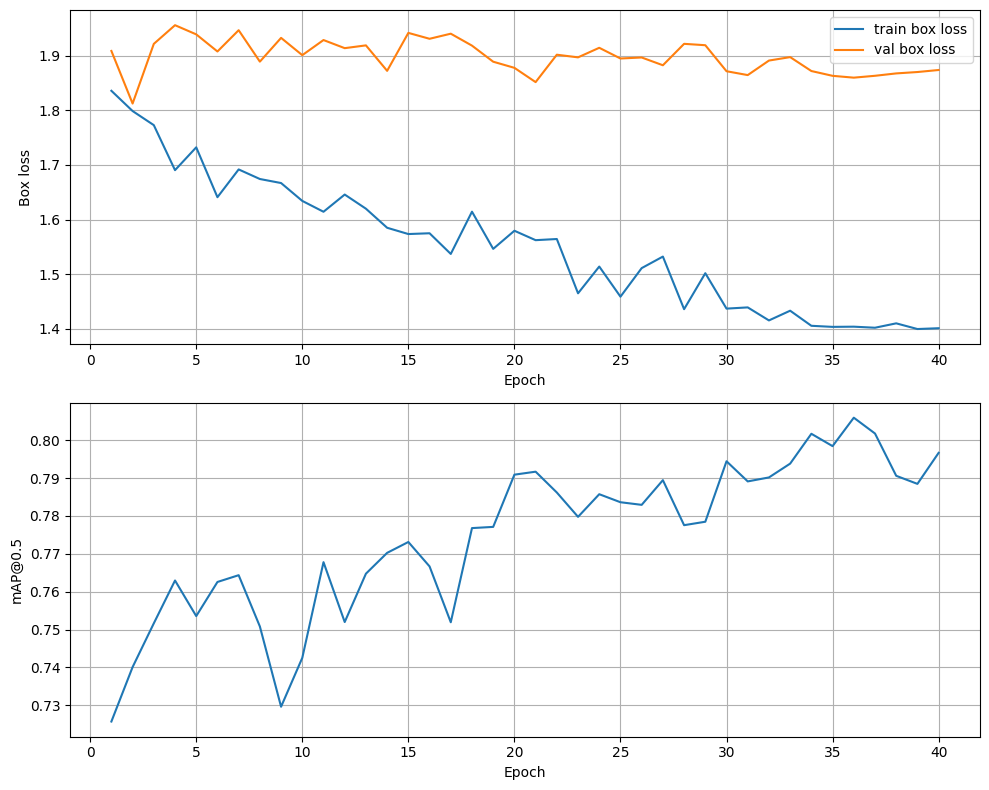

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

RUN_DIR = Path("/content/yolo_runs_200_m/stage1_freeze_m")  # ⬅ این‌بار استیج ۱

results_csv = RUN_DIR / "results.csv"
df = pd.read_csv(results_csv)

epochs   = df["epoch"]
train_box = df["train/box_loss"]
val_box   = df["val/box_loss"]
map50     = df["metrics/mAP50(B)"]

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, train_box, label="train box loss")
plt.plot(epochs, val_box,   label="val box loss")
plt.legend(); plt.grid(True); plt.xlabel("Epoch"); plt.ylabel("Box loss")

plt.subplot(2, 1, 2)
plt.plot(epochs, map50)
plt.grid(True); plt.xlabel("Epoch"); plt.ylabel("mAP@0.5")

plt.tight_layout()
plt.show()


Using results file: /content/yolo_runs_200_m/stage2_finetune_m2/results.csv
Epochs in file: 1 → 80


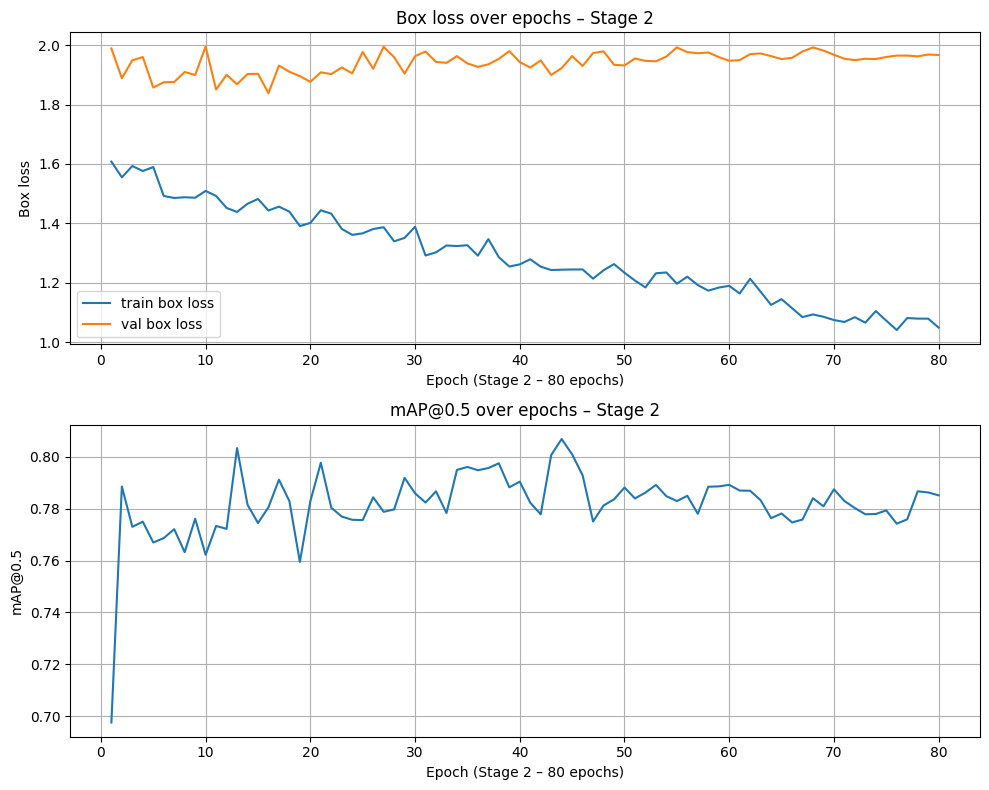

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

RUN_DIR = Path("/content/yolo_runs_200_m/stage2_finetune_m2")  # 🔺 دقت کن m2

results_csv = RUN_DIR / "results.csv"
print("Using results file:", results_csv)

df = pd.read_csv(results_csv)
print("Epochs in file:", df["epoch"].min(), "→", df["epoch"].max())

epochs    = df["epoch"]
train_box = df["train/box_loss"]
val_box   = df["val/box_loss"]
map50     = df["metrics/mAP50(B)"]

plt.figure(figsize=(10, 8))

# ---- Box loss ----
plt.subplot(2, 1, 1)
plt.plot(epochs, train_box, label="train box loss")
plt.plot(epochs, val_box,   label="val box loss")
plt.xlabel("Epoch (Stage 2 – 80 epochs)")
plt.ylabel("Box loss")
plt.title("Box loss over epochs – Stage 2")
plt.legend()
plt.grid(True)

# ---- mAP@0.5 ----
plt.subplot(2, 1, 2)
plt.plot(epochs, map50)
plt.xlabel("Epoch (Stage 2 – 80 epochs)")
plt.ylabel("mAP@0.5")
plt.title("mAP@0.5 over epochs – Stage 2")
plt.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
from ultralytics import YOLO
from pathlib import Path

# 🔹 Paths (change if your paths are different)
MODEL_PATH = "/content/yolo_runs_200_m/stage2_finetune_m/weights/best.pt"
VIDEO_PATH = "/content/02521568-dd1da95c.mov"

# Load your finetuned model
model = YOLO(MODEL_PATH)

# Folder for results
PROJECT = "video_results"
NAME    = "test1"

results = model.predict(
    source=VIDEO_PATH,   # input video
    imgsz=640,
    conf=0.25,           # confidence threshold
    iou=0.45,
    device=0,
    save=True,           # save annotated video
    project=PROJECT,
    name=NAME,
    vid_stride=1         # 1 = every frame, 2 = every 2nd frame (faster)
)

print("✅ Inference done.")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1210) /content/02521568-dd1da95c.mov: 384x640 5 cars, 25.8ms
video 1/1 (frame 2/1210) /content/02521568-dd1da95c.mov: 384x640 5 cars, 25.0ms
video 1/1 (frame 3/1210) /content/02521568-dd1da95c.mov: 384x640 5 cars, 25.0ms
video 1/1 (frame 4/1210) /content/02521568-dd1da95c.mov: 384x640 5 cars, 25.0ms
video 1/1 (frame 5/1210) /content/02521568-dd1da95c.mov: 384x640 6 cars, 25.0ms
video 1/1 (frame 6/1210) /content/02521568-dd1da95c.mov:

In [ ]:
from ultralytics import YOLO

best_path = "/content/yolo_runs_200_m/stage2_finetune_m2/weights/best.pt"
model = YOLO(best_path)
